# Proyecto de curso Machine Learning

In [1]:
import os, sys, re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
parameters = {
    'path': os.path.dirname(sys.path[0]),
    'path_in': os.path.join(os.path.dirname(sys.path[0]), '01_data'),
    'path_out': os.path.join(os.path.dirname(sys.path[0]), '02_output')
}

## 1.) Curación de datos

In [3]:
proyect_name = 'poker-hand'
datasets = {
    'testing': os.path.join(parameters['path_in'], proyect_name, 'poker-hand-training-true.data'),
    'training': os.path.join(parameters['path_in'], proyect_name, 'poker-hand-testing.data')
}

df_testing = pd.read_csv(datasets['testing'], header=None, names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','CLASS'])
df_training = pd.read_csv(datasets['training'], header=None, names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','CLASS'])


df = pd.concat([df_testing, df_training], ignore_index=True)
df.head()

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,CLASS
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


In [4]:
# Informacion del DataFrame
print(df.info())
print('shape:', df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025010 entries, 0 to 1025009
Data columns (total 11 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   S1      1025010 non-null  int64
 1   C1      1025010 non-null  int64
 2   S2      1025010 non-null  int64
 3   C2      1025010 non-null  int64
 4   S3      1025010 non-null  int64
 5   C3      1025010 non-null  int64
 6   S4      1025010 non-null  int64
 7   C4      1025010 non-null  int64
 8   S5      1025010 non-null  int64
 9   C5      1025010 non-null  int64
 10  CLASS   1025010 non-null  int64
dtypes: int64(11)
memory usage: 86.0 MB
None
shape: (1025010, 11)


In [5]:
df.value_counts('CLASS')

CLASS
0    513702
1    433097
2     48828
3     21634
4      3978
5      2050
6      1460
7       236
8        17
9         8
Name: count, dtype: int64

## 2.) Selección de Características

### 2.1.) Componentes Principales (PCA)

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
# Estandarizar los rangos de las cartas
scaler = StandardScaler()
X = df.iloc[:,:-1].values
X_scaled = scaler.fit_transform(X)

In [8]:
# Aplicar PCA

pca = PCA(n_components=None)
Xpca = pca.fit_transform(X_scaled)
pilambda = pca.explained_variance_ratio_
Xloadings = pca.components_.T * np.sqrt(pilambda)

In [9]:
# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

print('Varianza explicada por cada componente:', explained_variance)
print('Varianza explicada acumulada:', cumulative_explained_variance)

Varianza explicada por cada componente: [0.10255461 0.10221355 0.10207898 0.10205923 0.10189938 0.1018206
 0.10166758 0.10162753 0.0921793  0.09189924]
Varianza explicada acumulada: [0.10255461 0.20476815 0.30684714 0.40890637 0.51080575 0.61262635
 0.71429393 0.81592146 0.90810076 1.        ]


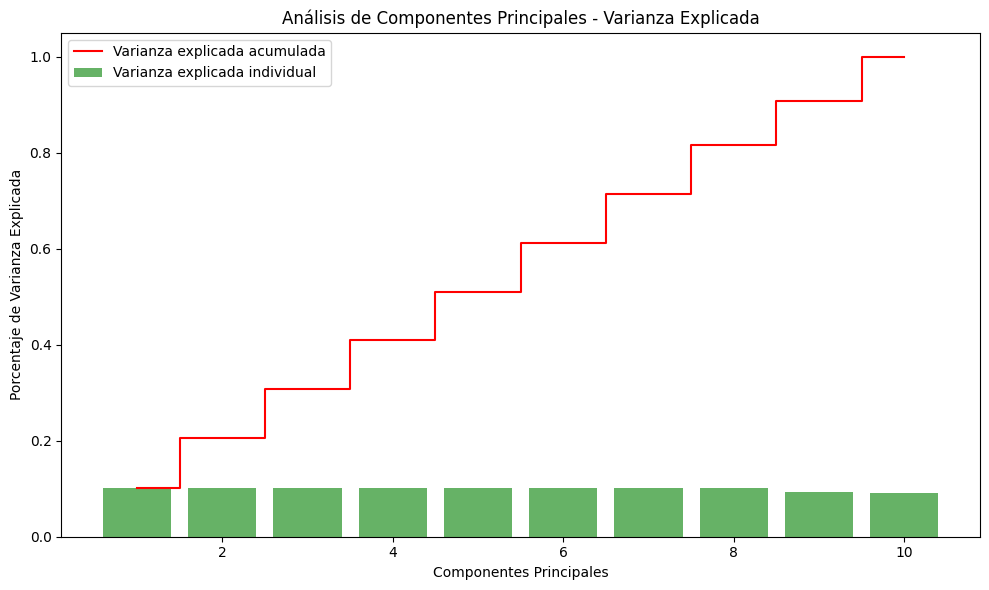

In [10]:
# Graficar la varianza explicada y la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.6, align='center',
        label='Varianza explicada individual', color='g')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid',
         label='Varianza explicada acumulada', color='r')
plt.ylabel('Porcentaje de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.title('Análisis de Componentes Principales - Varianza Explicada')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

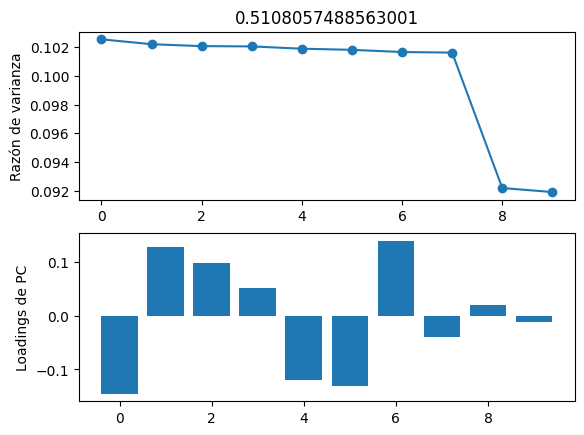

In [11]:
plt.subplot(211)
plt.plot(range(X.shape[1]),pilambda,'o-')
plt.ylabel('Razón de varianza')
plt.title(np.sum(pilambda[0:5]))
plt.subplot(212)
plt.bar(range(X.shape[1]),Xloadings[:,2])
plt.ylabel('Loadings de PC')
plt.show()

### 2.2.) ReliefF 

In [28]:
from skrebate import ReliefF

print(df.info())
X = df.iloc[:,:-1].values
L = df.iloc[:,-1].values
r = ReliefF(n_neighbors=2, n_features_to_select=None)
M = r.fit(X, L)
for feature_name, feature_score in zip(df.drop('CLASS', axis=1).columns,
                                       r.feature_importances_):
    print(feature_name, '\t', feature_score)
    
print(r.feature_importances_)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025010 entries, 0 to 1025009
Data columns (total 11 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   S1      1025010 non-null  int64
 1   C1      1025010 non-null  int64
 2   S2      1025010 non-null  int64
 3   C2      1025010 non-null  int64
 4   S3      1025010 non-null  int64
 5   C3      1025010 non-null  int64
 6   S4      1025010 non-null  int64
 7   C4      1025010 non-null  int64
 8   S5      1025010 non-null  int64
 9   C5      1025010 non-null  int64
 10  CLASS   1025010 non-null  int64
dtypes: int64(11)
memory usage: 86.0 MB
None


: 